Original Data Shape: (150, 4)

Explained Variance Ratio:
Principal Component 1: 0.7296
Principal Component 2: 0.2285

Cumulative Explained Variance: [0.72962445 0.95813207]


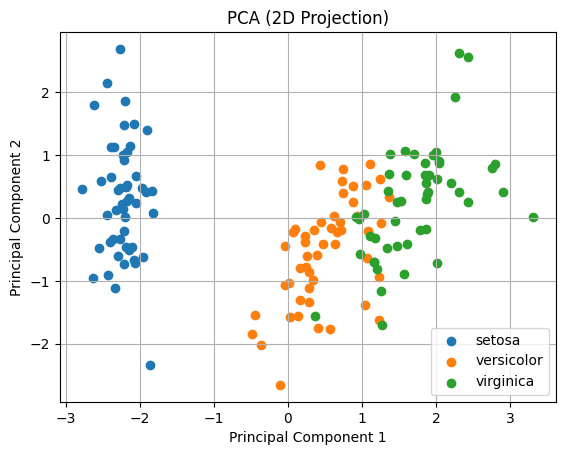

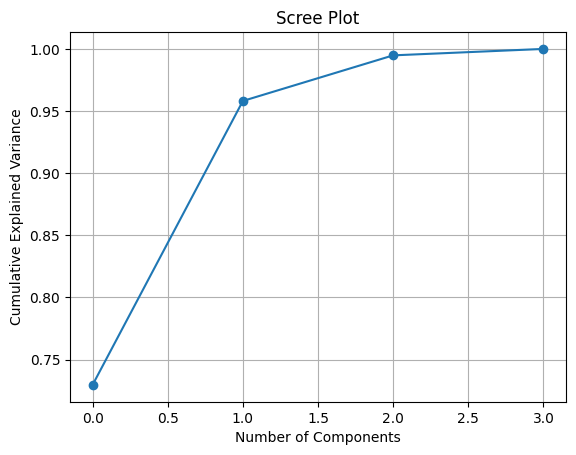

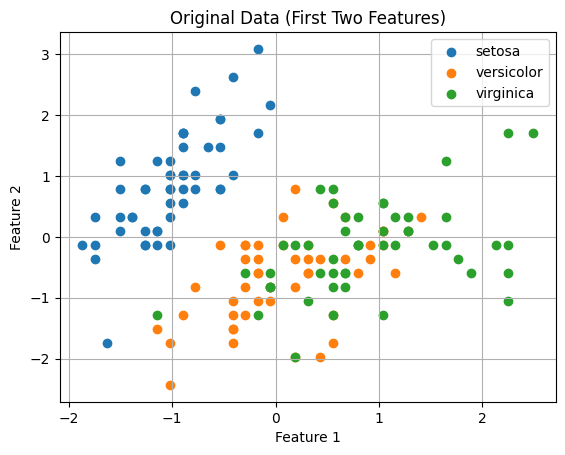

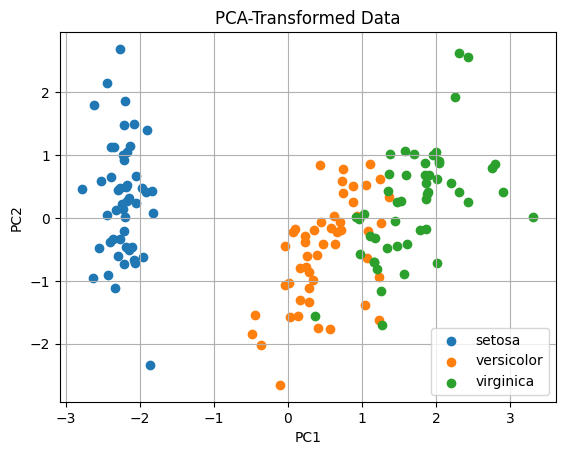

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names
print("Original Data Shape:", X.shape)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var:.4f}")

print("\nCumulative Explained Variance:",
      np.cumsum(pca.explained_variance_ratio_))

plt.figure()
for i, target in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0],
                X_pca[y == i, 1],
                label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2D Projection)")
plt.legend()
plt.grid()
plt.show()

pca_full = PCA()
pca_full.fit(X_standardized)

plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

plt.figure()
for i, target in enumerate(target_names):
    plt.scatter(X_standardized[y == i, 0],
                X_standardized[y == i, 1],
                label=target)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.legend()
plt.grid()
plt.show()


plt.figure()
for i, target in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0],
                X_pca[y == i, 1],
                label=target)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA-Transformed Data")
plt.legend()
plt.grid()
plt.show()